# <span style="color: #8be9fd">Initialization</span>

## <span style="color: #8be9fd">Load Packages</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from dotenv import load_dotenv
load_dotenv()

import os

import sys
sys.path.append(os.environ.get('PROJECT_PATH'))

## <span style="color: #8be9fd">Define Metadata</span>

In [2]:
from datetime import date

target_class_name = 'Class'
labels = ['Non-Fraud', 'Fraud']
input_file_name = 'creditcard.csv'
intermediate_data_path = '../data/intermediate/'
output_df_file_name = 'day2_cleaned_df_output_'
export_date = str(date.today().strftime('%Y%m%d'))

# <span style="color: #8be9fd">Load Data</span>

In [3]:
df = pd.read_csv(f'../data/raw/{input_file_name}')
print(df.shape)
df.sample(5)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
217551,140934.0,-3.490948,1.969030,1.208061,1.121673,-2.057447,0.556366,-1.693499,1.900619,1.281566,...,0.070733,0.793528,-0.097075,-0.000896,0.788487,-0.206509,0.034209,-0.135932,19.99,0
233094,147437.0,-0.252913,0.739525,-1.491578,-1.565861,0.761827,-1.285801,1.360073,-0.416580,-1.709309,...,0.055185,0.666240,-0.218662,0.794982,-0.407734,0.751106,-0.428439,-0.078688,33.00,0
616,464.0,1.157235,0.138019,0.384987,1.403600,-0.222512,-0.197943,0.018264,0.029727,0.412466,...,-0.108900,-0.124281,-0.055454,0.072990,0.634638,-0.310493,0.033931,0.014937,11.99,0
204581,135342.0,-0.353236,-0.401812,-1.609000,-0.378384,3.205696,0.109471,0.685046,0.164355,-0.782429,...,0.575993,1.544485,-0.076511,-0.580596,0.354954,0.171326,-0.050425,-0.067777,28.40,0
13057,22917.0,-1.733688,0.012999,2.402611,-0.570835,1.335929,-1.531991,0.258900,-0.050404,0.662983,...,-0.195260,-0.740797,0.114578,0.536847,0.272180,-0.193600,-0.088849,0.070787,11.99,0


In [4]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
df.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# <span style="color: #8be9fd">Prepping before resampling</span>

## <span style="color: #8be9fd">Feature Target and Train Test Split</span>

In [6]:
X = df.drop(target_class_name, axis=1)
Y = df[target_class_name]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

print(X_train.shape, X_test.shape, sum(Y_train), sum(Y_test))

(227845, 30) (56962, 30) 394 98


## <span style="color: #8be9fd">Initializing Metrics Capture</span>

In [7]:
sampling_strategy_metrics_df = pd.DataFrame(
    columns=['Pos_Precision', 'Pos_Recall', 'Pos_F1',
             'ROC AUC', 'FN', 'TP', 'FP', 'TN', 'Precision_at_Recall'],
    index=['Undersampling', 'Oversampling', 'Hybrid', 'Custom'],
)

sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oversampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <span style="color: #8be9fd">Importing functions</span>

In [8]:
from helper_functions_comprehensive import test_rf_performance_function, resample_and_test_performance_function

## <span style="color: #8be9fd">Comparison of Resampling Strategies</span>

### <span style="color: #8be9fd">Resampling Method1: Undersampling - RandomUnderSampler</span>

The size of the resampled train sets are as follows:
(788, 30) 394
Has a Test accuracy of 96.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.96      0.98     56864
       Fraud       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

The ROC AUC Score on Test set is 0.98
Confusion matrix, without normalization
[[54827  2037]
 [    8    90]]


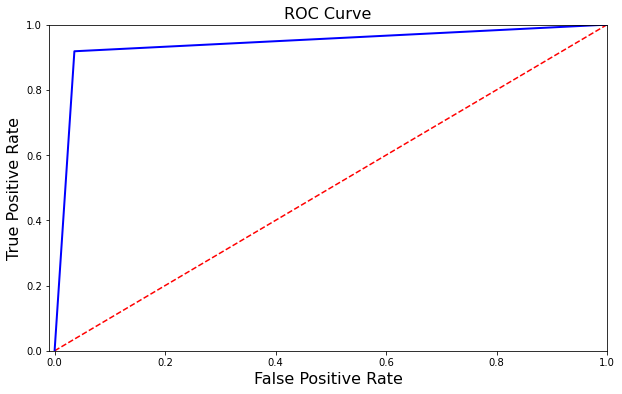

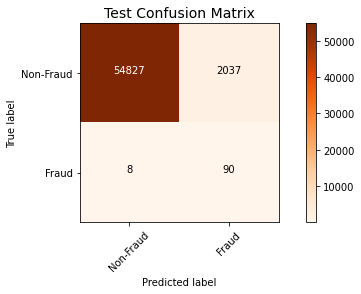

In [9]:
from imblearn.under_sampling import RandomUnderSampler

_, __, sampling_strategy_metrics_df.loc['Undersampling'] = resample_and_test_performance_function(
    RandomUnderSampler(random_state=42), X_train, Y_train, X_test, Y_test, labels
)

In [10]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.042313,0.918367,0.080899,0.98,8.0,90.0,2037.0,54827.0,0.711864
Oversampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <span style="color: #8be9fd">Resampling Method2: Oversampling - SMOTE</span>

The size of the resampled train sets are as follows:
(454902, 30) 227451
Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.96
Confusion matrix, without normalization
[[56848    16]
 [   17    81]]


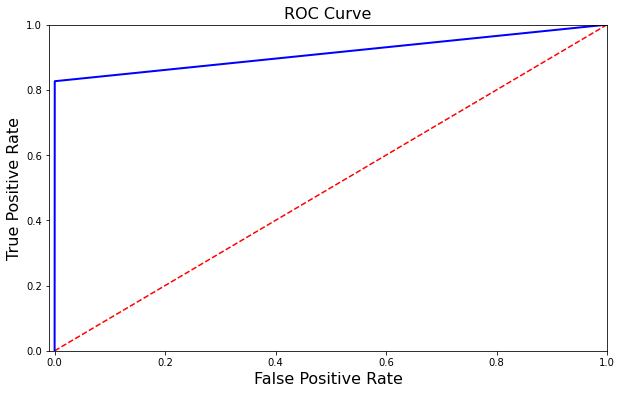

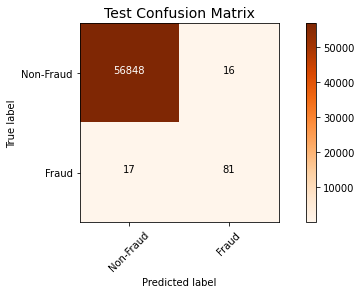

In [11]:
from imblearn.over_sampling import SMOTE

_, __, sampling_strategy_metrics_df.loc['Oversampling'] = resample_and_test_performance_function(
    SMOTE(random_state=42), X_train, Y_train, X_test, Y_test, labels
)

In [12]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.042313,0.918367,0.080899,0.98,8.0,90.0,2037.0,54827.0,0.711864
Oversampling,0.835052,0.826531,0.830769,0.96,17.0,81.0,16.0,56848.0,0.8
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <span style="color: #8be9fd">Resampling Method3: Hybrid Oversampling and Undersampling using SMOTEENN</span>

The size of the resampled train sets are as follows:
(427652, 30) 218370
Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.96
Confusion matrix, without normalization
[[56841    23]
 [   13    85]]


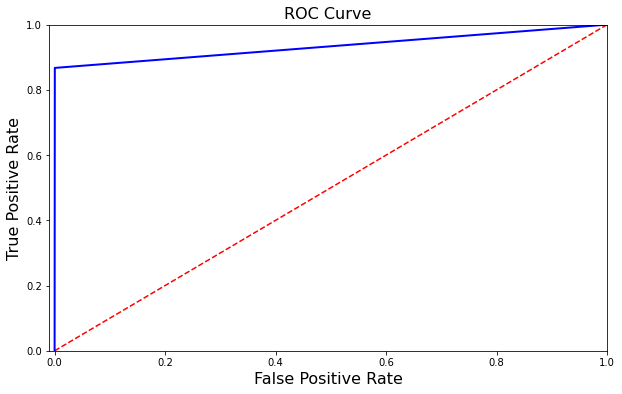

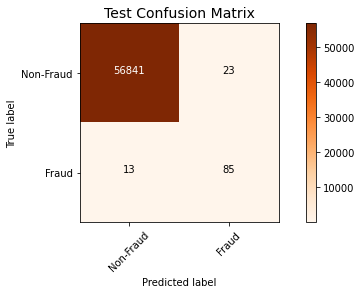

In [13]:
from imblearn.combine import SMOTEENN

_, __, sampling_strategy_metrics_df.loc['Hybrid'] = resample_and_test_performance_function(
    SMOTEENN(sampling_strategy='all', random_state=42), X_train, Y_train, X_test, Y_test, labels
)

In [14]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.042313,0.918367,0.080899,0.98,8.0,90.0,2037.0,54827.0,0.711864
Oversampling,0.835052,0.826531,0.830769,0.96,17.0,81.0,16.0,56848.0,0.8
Hybrid,0.787037,0.867347,0.825243,0.96,13.0,85.0,23.0,56841.0,0.787037
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <span style="color: #8be9fd">Resampling Method4: Custom function to oversample at different rates</span>

In [15]:
from helper_functions_comprehensive import augment_data_function

X_resampled_train, Y_resampled_train = augment_data_function(
    X_train, Y_train, positive_upsampling_ratio=4, negative_upsampling_ratio=2
)

print(X_resampled_train.shape, sum(Y_resampled_train))

(456478, 30) 1576.0


Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.95
Confusion matrix, without normalization
[[56854    10]
 [   15    83]]


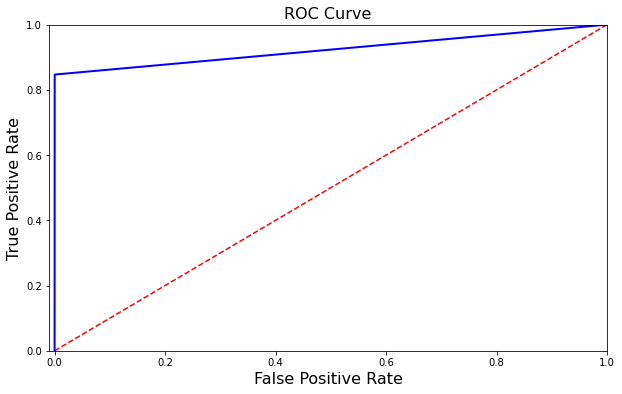

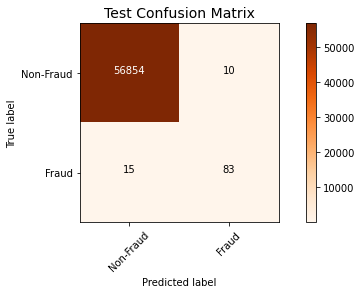

In [16]:
sampling_strategy_metrics_df.loc['Custom'] = test_rf_performance_function(
    X_resampled_train, Y_resampled_train, X_test, Y_test, labels
)

In [17]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.042313,0.918367,0.080899,0.98,8.0,90.0,2037.0,54827.0,0.711864
Oversampling,0.835052,0.826531,0.830769,0.96,17.0,81.0,16.0,56848.0,0.8
Hybrid,0.787037,0.867347,0.825243,0.96,13.0,85.0,23.0,56841.0,0.787037
Custom,0.892473,0.846939,0.86911,0.95,15.0,83.0,10.0,56854.0,0.884211


# <span style="color: #8be9fd">EDA & Cleaning for ML Generalizability</span>

## <span style="color: #8be9fd">Pre-cleaning setup</span>

this dataset is fairly okay and there isnt anything that needs to be applied to the whole dataset. So we will skip this section

## <span style="color: #8be9fd">EDA & Handling Outliers</span>

### <span style="color: #8be9fd">Selecting top features - Feature Importances</span>

In [18]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_resampled_train, Y_resampled_train)

RandomForestClassifier(random_state=42)

In [19]:
feature_importances = classifier.feature_importances_

feature_importances_df = pd.DataFrame({
    'feature': list(X.columns),
    'importance': feature_importances,
}).sort_values('importance', ascending=False)

feature_importances_df.head()

,feature,importance
17,V17,0.179180
14,V14,0.153202
12,V12,0.150652
10,V10,0.104844
16,V16,0.081966


In [20]:
imp_column_list = list(feature_importances_df.head()['feature'].values)
imp_column_list

['V17', 'V14', 'V12', 'V10', 'V16']

In [21]:
XY_resampled_train = pd.concat([X_resampled_train, Y_resampled_train], axis=1)
XY_resampled_train.rename(columns={0: target_class_name}, inplace=True)

print(len(XY_resampled_train), sum(Y_resampled_train))
XY_resampled_train.head()

456478 1576.0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
326392,56061.0,0.946201,2.723038,1.188370,-2.071029,-0.645028,0.058043,-0.710116,0.771046,-2.019551,...,-0.169184,-0.845637,0.339060,-0.811356,0.148259,0.361756,-0.118261,-0.035589,10.00,0.0
387028,1517.0,-0.627577,1.002469,-0.983580,-0.565997,-1.335970,-0.707282,1.128648,0.559435,0.322307,...,0.630732,-0.824070,0.115238,0.486069,-0.295006,-0.228363,-0.625565,-0.052095,15.45,0.0
163142,91929.0,0.215073,-0.295067,1.500247,-1.463686,-0.570438,0.951431,-0.924938,0.188670,1.626176,...,0.035657,0.628107,-0.049854,0.182715,-0.453174,-0.304186,-0.044989,0.008168,10.89,0.0
10523,30426.0,-1.182199,0.187027,1.943799,-1.639044,-0.950472,-0.596769,-0.636670,0.544201,-1.250241,...,0.553752,1.444296,-0.165767,0.464758,0.084961,-0.178507,0.248975,0.065126,19.99,0.0
402077,68796.0,-1.181072,-0.091066,1.589540,1.056389,1.130490,1.347457,0.181419,0.228698,0.291059,...,0.098985,0.180486,0.064767,0.005463,0.039004,-0.307554,-0.067967,0.010975,542.21,0.0


In [22]:
minority_resampled_train_df = XY_resampled_train[XY_resampled_train[target_class_name]==1].copy()
majority_resampled_train_df = XY_resampled_train[XY_resampled_train[target_class_name]==0].copy()

len(minority_resampled_train_df), len(majority_resampled_train_df), len(XY_resampled_train)

(1576, 454902, 456478)

### <span style="color: #8be9fd">EDA - Numerical Features</span>

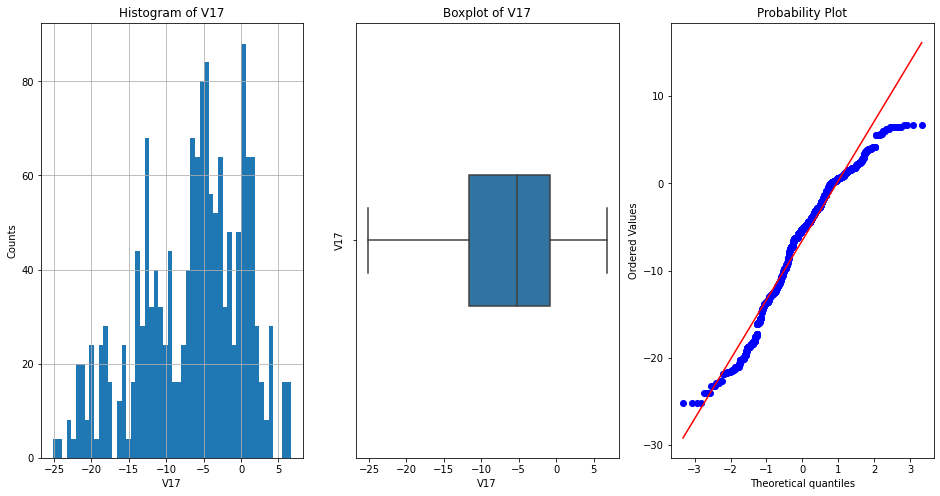

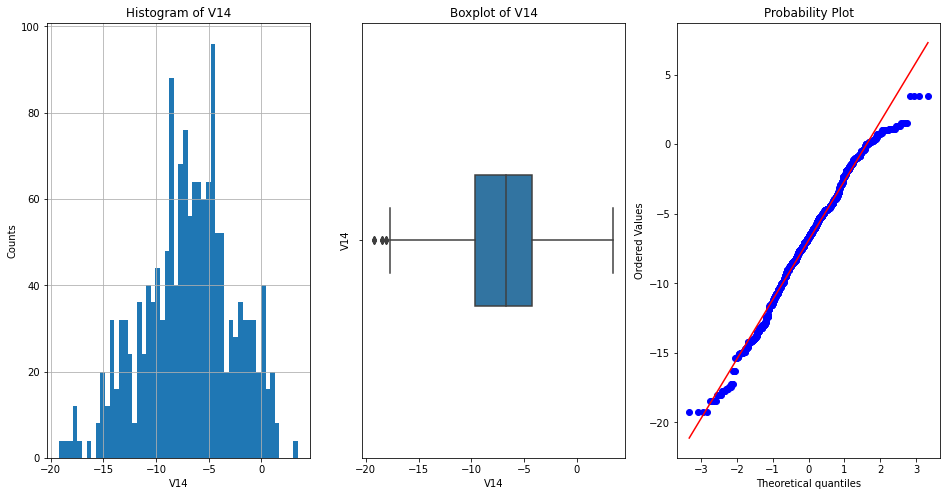

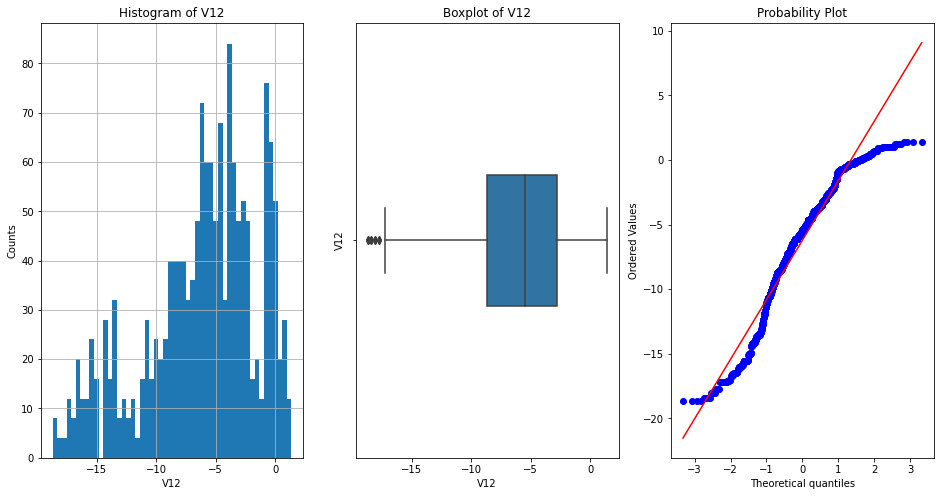

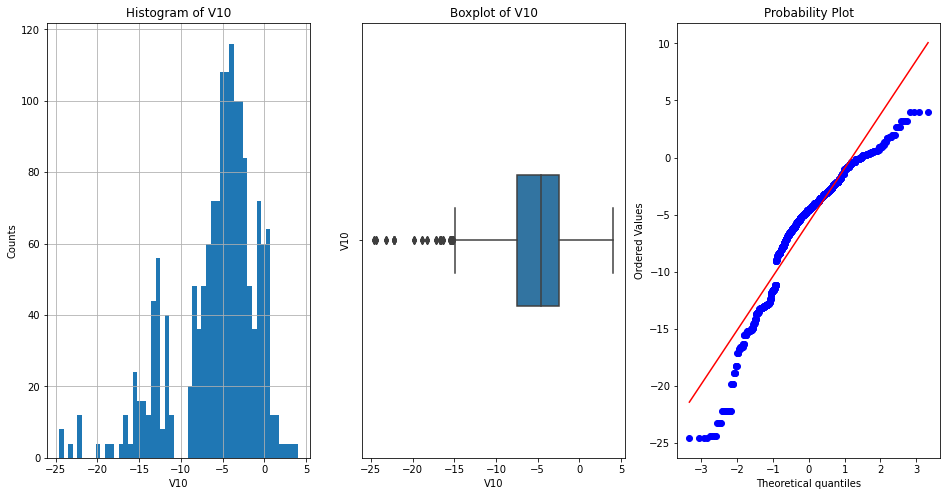

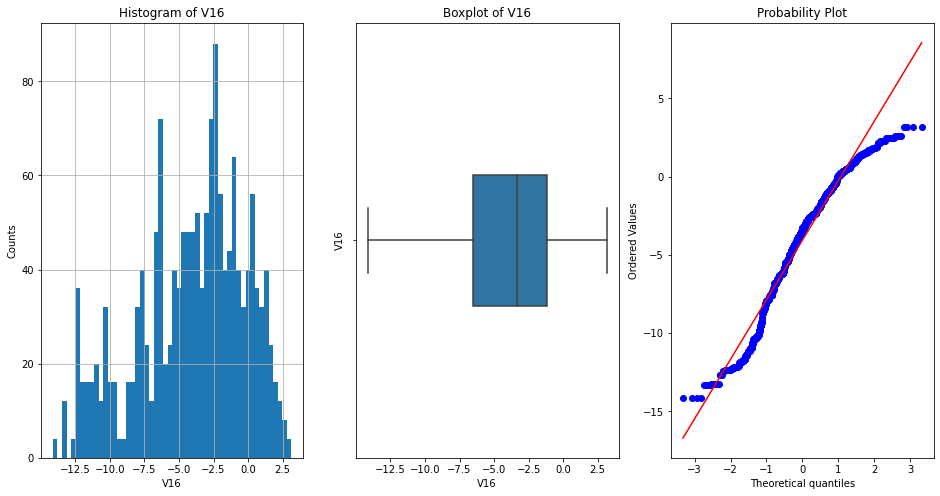

In [23]:
from helper_functions_comprehensive import numerical_distribution_function

no_of_bins = len(minority_resampled_train_df) // 30

numerical_distribution_function(minority_resampled_train_df[imp_column_list], bins=no_of_bins)

### <span style="color: #8be9fd">Outlier Definition, Detection & Removal</span>

In [26]:
outlier_cutoff_df = minority_resampled_train_df[imp_column_list].quantile([0.25, 0.75]).T

outlier_cutoff_df['lower_cutoff'] = outlier_cutoff_df[0.25] - 1.5*(outlier_cutoff_df[0.75] - outlier_cutoff_df[0.25])
outlier_cutoff_df['upper_cutoff'] = outlier_cutoff_df[0.75] + 1.5*(outlier_cutoff_df[0.75] - outlier_cutoff_df[0.25])

outlier_cutoff_df

,0.25,0.75,lower_cutoff,upper_cutoff
V17,-11.647158,-0.868183,-27.815620,15.300280
V14,-9.657627,-4.211756,-17.826433,3.957050
V12,-8.681609,-2.820042,-17.473959,5.972308
V10,-7.509557,-2.495619,-15.030465,5.025288
V16,-6.525081,-1.139754,-14.603071,6.938236


In [27]:
for col in imp_column_list:
    old_number_of_rows = len(minority_resampled_train_df)
    
    upper_cutoff = outlier_cutoff_df.loc[col, 'upper_cutoff']
    lower_cutoff = outlier_cutoff_df.loc[col, 'lower_cutoff']
    
    minority_resampled_train_df = minority_resampled_train_df.drop(
        minority_resampled_train_df[
            (minority_resampled_train_df[col] > upper_cutoff) | (minority_resampled_train_df[col] < lower_cutoff)
        ].index
    )
    
    print('Outliers deleted in column {} is {}'.format(col, old_number_of_rows - len(minority_resampled_train_df)))

Outliers deleted in column V17 is 0
Outliers deleted in column V14 is 12
Outliers deleted in column V12 is 15
Outliers deleted in column V10 is 85
Outliers deleted in column V16 is 0


In [28]:
print('{} Outliers were removed from {} number resampled Fraud data'.format(
    sum(XY_resampled_train[target_class_name]) - len(minority_resampled_train_df),
    len(XY_resampled_train[XY_resampled_train[target_class_name]==1]),
))

112.0 Outliers were removed from 1576 number resampled Fraud data


In [29]:
XY_resampled_train = pd.concat([majority_resampled_train_df, minority_resampled_train_df], axis=0).sort_index()

X_cleaned_resampled_train = XY_resampled_train.drop(target_class_name, axis=1)
Y_cleaned_resampled_train = XY_resampled_train[target_class_name]

print(len(X_cleaned_resampled_train), sum(Y_cleaned_resampled_train))
X_cleaned_resampled_train.head()

456366 1464.0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


### <span style="color: #8be9fd">Testing Performance Improvement</span>

Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.90      0.83      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.95
Confusion matrix, without normalization
[[56855     9]
 [   17    81]]


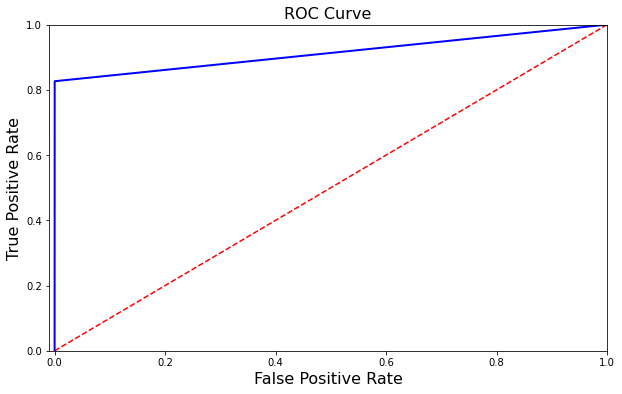

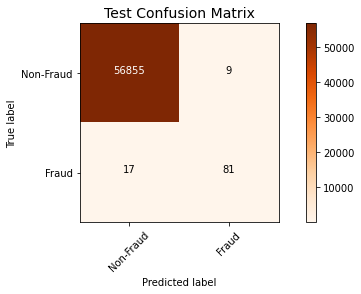

Counter({'TN': 56855,
         'TP': 81,
         'FN': 17,
         'FP': 9,
         'Pos_Precision': 0.9,
         'Pos_Recall': 0.826530612244898,
         'Pos_F1': 0.8617021276595744,
         'ROC AUC': 0.95,
         'Precision_at_Recall': 0.865979381443299})

In [30]:
test_rf_performance_function(X_cleaned_resampled_train, Y_cleaned_resampled_train, X_test, Y_test, labels)

In [31]:
X_resampled_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
326392,56061.0,0.946201,2.723038,1.188370,-2.071029,-0.645028,0.058043,-0.710116,0.771046,-2.019551,...,0.141561,-0.169184,-0.845637,0.339060,-0.811356,0.148259,0.361756,-0.118261,-0.035589,10.00
387028,1517.0,-0.627577,1.002469,-0.983580,-0.565997,-1.335970,-0.707282,1.128648,0.559435,0.322307,...,0.087964,0.630732,-0.824070,0.115238,0.486069,-0.295006,-0.228363,-0.625565,-0.052095,15.45
163142,91929.0,0.215073,-0.295067,1.500247,-1.463686,-0.570438,0.951431,-0.924938,0.188670,1.626176,...,0.034225,0.035657,0.628107,-0.049854,0.182715,-0.453174,-0.304186,-0.044989,0.008168,10.89
10523,30426.0,-1.182199,0.187027,1.943799,-1.639044,-0.950472,-0.596769,-0.636670,0.544201,-1.250241,...,0.249440,0.553752,1.444296,-0.165767,0.464758,0.084961,-0.178507,0.248975,0.065126,19.99
402077,68796.0,-1.181072,-0.091066,1.589540,1.056389,1.130490,1.347457,0.181419,0.228698,0.291059,...,-0.102249,0.098985,0.180486,0.064767,0.005463,0.039004,-0.307554,-0.067967,0.010975,542.21


In [32]:
from helper_functions_comprehensive import data_export_function

In [33]:
data_export_function(
    X_resampled_train, Y_resampled_train, Y_train, Y_test, intermediate_data_path, output_df_file_name, export_date
)